## Data Understanding

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [4]:
df = pd.read_csv("C:/Users/marty/Desktop/OnlineNewsPopularity.csv")

In [5]:
print("Dataset summary: ")
print(df.info())

#This cell gives the following information about the dataset:
#The data set has 39644 entries and 61 columns
#Data types are: float(59), int64(1), object(1)
#The dataset uses 18.5+ MB of memory

Dataset summary: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1    timedelta                      39644 non-null  float64
 2    n_tokens_title                 39644 non-null  float64
 3    n_tokens_content               39644 non-null  float64
 4    n_unique_tokens                39644 non-null  float64
 5    n_non_stop_words               39644 non-null  float64
 6    n_non_stop_unique_tokens       39644 non-null  float64
 7    num_hrefs                      39644 non-null  float64
 8    num_self_hrefs                 39644 non-null  float64
 9    num_imgs                       39644 non-null  float64
 10   num_videos                     39644 non-null  float64
 11   average_token_length           39644 non-null  float64
 12   num_keywords 

In [6]:
df.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [7]:
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [8]:
df.tail()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
39639,http://mashable.com/2014/12/27/samsung-app-aut...,8.0,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,...,0.100000,0.75,-0.260000,-0.5,-0.125000,0.100000,0.000000,0.400000,0.000000,1800
39640,http://mashable.com/2014/12/27/seth-rogen-jame...,8.0,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,...,0.136364,0.70,-0.211111,-0.4,-0.100000,0.300000,1.000000,0.200000,1.000000,1900
39641,http://mashable.com/2014/12/27/son-pays-off-mo...,8.0,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,...,0.136364,0.50,-0.356439,-0.8,-0.166667,0.454545,0.136364,0.045455,0.136364,1900
39642,http://mashable.com/2014/12/27/ukraine-blasts/,8.0,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,...,0.062500,0.50,-0.205246,-0.5,-0.012500,0.000000,0.000000,0.500000,0.000000,1100
39643,http://mashable.com/2014/12/27/youtube-channel...,8.0,10.0,157.0,0.701987,1.0,0.846154,1.0,1.0,0.0,...,0.100000,0.50,-0.200000,-0.2,-0.200000,0.333333,0.250000,0.166667,0.250000,1300


In [9]:
print("Descriptive statistics: ")
print(df.describe())

Descriptive statistics: 
          timedelta   n_tokens_title   n_tokens_content   n_unique_tokens  \
count  39644.000000     39644.000000       39644.000000      39644.000000   
mean     354.530471        10.398749         546.514731          0.548216   
std      214.163767         2.114037         471.107508          3.520708   
min        8.000000         2.000000           0.000000          0.000000   
25%      164.000000         9.000000         246.000000          0.470870   
50%      339.000000        10.000000         409.000000          0.539226   
75%      542.000000        12.000000         716.000000          0.608696   
max      731.000000        23.000000        8474.000000        701.000000   

        n_non_stop_words   n_non_stop_unique_tokens     num_hrefs  \
count       39644.000000               39644.000000  39644.000000   
mean            0.996469                   0.689175     10.883690   
std             5.231231                   3.264816     11.332017   
min  

## Data Preparation 

In [10]:
# Remove url column as this is not useful for analysis

df = df.drop('url', axis=1)

In [11]:
#changing the data types
df.iloc[:, 0:3] = df.iloc[:, 0:3].astype('int64')
df.iloc[:, 3:6] = df.iloc[:, 3:6].astype('float64')
df.iloc[:, 6:10] = df.iloc[:, 6:10].astype('int64')
df.iloc[:, 10:11] = df.iloc[:, 10:11].astype('float64')
df.iloc[:, 11:12] = df.iloc[:, 11:12].astype('int64')
df.iloc[:, 12:18] = df.iloc[:, 12:18].astype('bool')
df.iloc[:, 18:30] = df.iloc[:, 18:30].astype('float64')
df.iloc[:, 30:38] = df.iloc[:, 30:38].astype('bool')
df.iloc[:, 38:59] = df.iloc[:, 38:59].astype('float64')
df.iloc[:, 59:] = df.iloc[:, 59:].astype('int64')

## Exploratory Data Analysis 

Exploratory data analysis (EDA) is performed on the train set to help us understand the characteristics of the data on which our models will be trained. In our EDA, we included: 

* **target variable:** we started by investigating the target variable 
  
* **initial selection:** Investigation of features that most likely affect the target variable 

* **feature importance:** using tree-based models, we determined the most important features in predicting the target variable

## Target Variable

In [12]:
# Understanding the target variable

df[' shares'].describe()

count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name:  shares, dtype: float64

In [13]:
df[' shares'].median()

1400.0

We chose median as the popularity threshold because it is not affected by outliers as much as the mean.

In [14]:
# Labels for target variable

tar_var = list()
for share in df[' shares']: 
    if share > 1400: 
        tar_var.append('Popular') 
    elif share <= 1400: 
        tar_var.append('Unpopular')


# Create a new column in df

df = pd.concat([df.reset_index(drop=True), pd.DataFrame(tar_var, columns=['popularity'])], axis=1)

In [15]:
df.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,popularity
0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,...,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,Unpopular
1,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,...,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,Unpopular
2,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,...,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,Popular
3,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,...,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,Unpopular
4,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,...,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505,Unpopular


In [16]:
# Count target variable 

counts = df['popularity'].value_counts()

print(counts)

popularity
Unpopular    20082
Popular      19562
Name: count, dtype: int64


**Initial investigation** 

1. Number of words (n_tokens_content) vs. popularity relfected in shares 
2. Number of unique words (n_unique_words) vs. popularity
3. Average positive polarity (avg_positive_polarity) vs. popularity 
4. Days in the week vs. popularity 

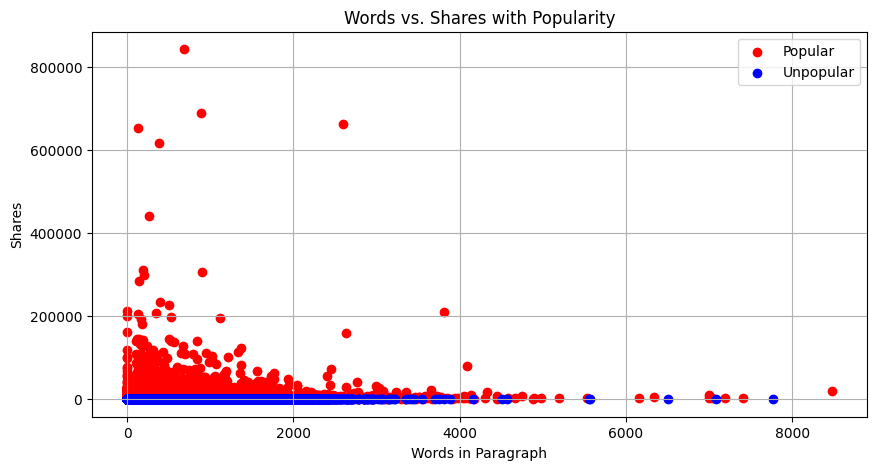

In [17]:
# Number of words vs. popularity 

popular = df[df['popularity'] == 'Popular']
unpopular = df[df['popularity'] == 'Unpopular']

plt.figure(figsize=(10, 5))
plt.scatter(popular[' n_tokens_content'], popular[' shares'], color='red', label='Popular')
plt.scatter(unpopular[' n_tokens_content'], unpopular[' shares'], color='blue', label='Unpopular')
plt.xlabel('Words in Paragraph')
plt.ylabel('Shares')
plt.title('Words vs. Shares with Popularity')
plt.legend()
plt.grid(True)
plt.show()

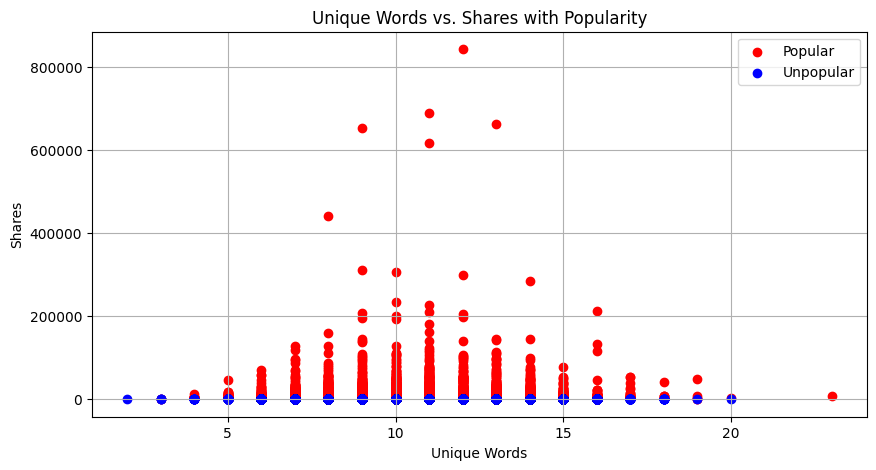

In [18]:
# Number of unique words vs. popularity 

plt.figure(figsize=(10, 5))
plt.scatter(popular[' n_tokens_title'], popular[' shares'], color='red', label='Popular')
plt.scatter(unpopular[' n_tokens_title'], unpopular[' shares'], color='blue', label='Unpopular')
plt.xlabel('Unique Words')
plt.ylabel('Shares')
plt.title('Unique Words vs. Shares with Popularity')
plt.legend()
plt.grid(True)
plt.show()

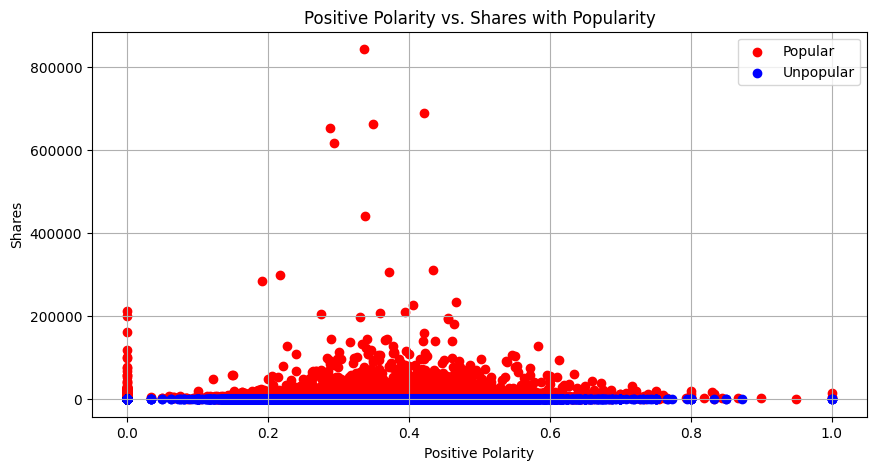

In [ ]:
# Average positive polarity vs. popularity

plt.figure(figsize=(10, 5))
plt.scatter(popular[' avg_positive_polarity'], popular[' shares'], color='red', label='Popular')
plt.scatter(unpopular[' avg_positive_polarity'], unpopular[' shares'], color='blue', label='Unpopular')
plt.xlabel('Positive Polarity')
plt.ylabel('Shares')
plt.title('Positive Polarity vs. Shares with Popularity')
plt.legend()
plt.grid(True)
plt.show()

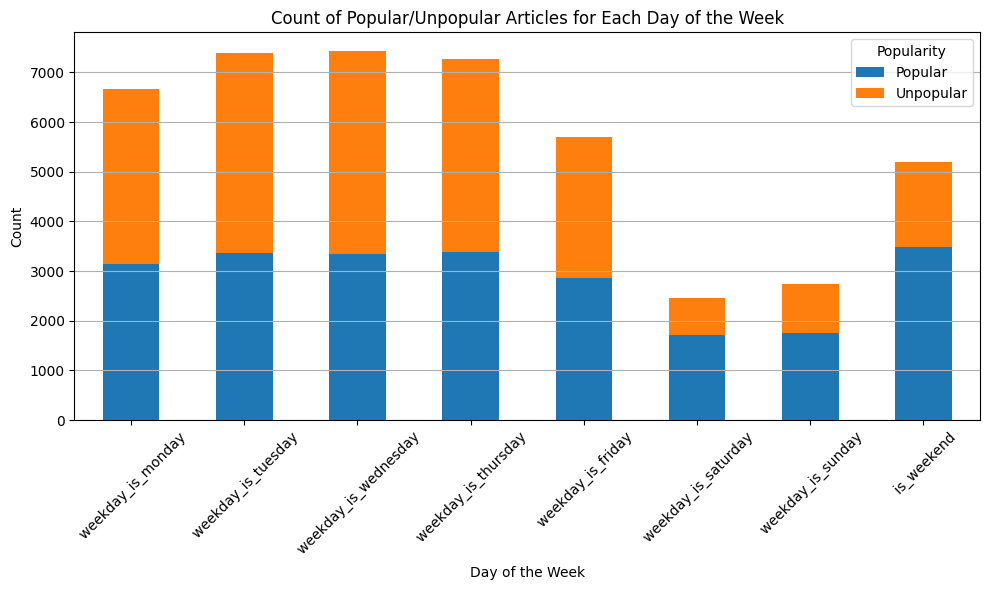

In [ ]:
# Days of the week vs. popularity 

# Group data by days of the week and 'popularity', count occurrences
day_columns = [' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday', ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday', ' weekday_is_sunday', ' is_weekend']
day_popularity_counts = df.groupby(['popularity'])[day_columns].sum().transpose()

# Create a bar plot
day_popularity_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.title('Count of Popular/Unpopular Articles for Each Day of the Week')
plt.legend(title='Popularity')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


# Classification Models

It was decided to scale the data with StandardScaler as it is less sensitive to outliers because it centers the data by removing the mean and scales it by the standard deviation.

First we drop the 'shares' column as the number of shares will not be used in the Classification models, but instead we will use the popularity variable that indicates if number of shares is more or less than 1400 shares.

In [21]:
df = df.drop(' shares', axis=1)

In [22]:
df.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,popularity
0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,Unpopular
1,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,Unpopular
2,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,Popular
3,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,Unpopular
4,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,Unpopular


In [23]:
#splitting into train test set and then again to split target and features
x = df.iloc[:,:59]
y = df.iloc[:,59:]
train_features, test_features, train_target, test_target = train_test_split(x, y, test_size=0.20)

### LogisticRegression 

In [24]:
standard_scaler_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(max_iter=1000))  
])

param_grid = {
    'model__C': [0.001, 0.01, 0.1, 1, 10]  
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(standard_scaler_pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(train_features, train_target.values.ravel())

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred = best_model.predict(test_features)

# Convert labels to numeric format
y_test_numeric = np.asarray(test_target, dtype=str)
y_pred_numeric = np.asarray(y_pred, dtype=str)

In [25]:
# Evaluate accuracy
accuracy_LR = accuracy_score(test_target, y_pred)
print(f'Accuracy: {accuracy_LR:.2f}')

# Evaluate F1 score
f1_LR = f1_score(y_test_numeric, y_pred_numeric, average='micro')
print(f'F1 Score: {f1_LR:.2f}')

# Evaluate macro-averaged precision and recall
precision_macro_LR = precision_score(y_test_numeric, y_pred_numeric, average='macro')
recall_macro_LR = recall_score(y_test_numeric, y_pred_numeric, average='macro')
print(f'Macro-Averaged Precision: {precision_macro_LR:.2f}')
print(f'Macro-Averaged Recall: {recall_macro_LR:.2f}')

# Evaluate micro-averaged precision and recall
precision_micro_LR = precision_score(y_test_numeric, y_pred_numeric, average='micro')
recall_micro_LR = recall_score(y_test_numeric, y_pred_numeric, average='micro')
print(f'Micro-Averaged Precision: {precision_micro_LR:.2f}')
print(f'Micro-Averaged Recall: {recall_micro_LR:.2f}')

# Print the best hyperparameters found by the grid search
print(f'Best Hyperparameters: {best_params}')

Accuracy: 0.65
F1 Score: 0.65
Macro-Averaged Precision: 0.65
Macro-Averaged Recall: 0.65
Micro-Averaged Precision: 0.65
Micro-Averaged Recall: 0.65
Best Hyperparameters: {'model__C': 0.1}


#### Feature Importance LogisticRegression

Top Features and their Coefficients:
                      Feature  Coefficient
26                 kw_avg_avg    -0.904805
25                 kw_max_avg     0.531967
4            n_non_stop_words    -0.315197
5    n_non_stop_unique_tokens     0.245700
38                     LDA_00    -0.213004
15     data_channel_is_socmed    -0.179870
16       data_channel_is_tech    -0.175725
37                 is_weekend    -0.140824
43        global_subjectivity    -0.128273
35        weekday_is_saturday    -0.127405


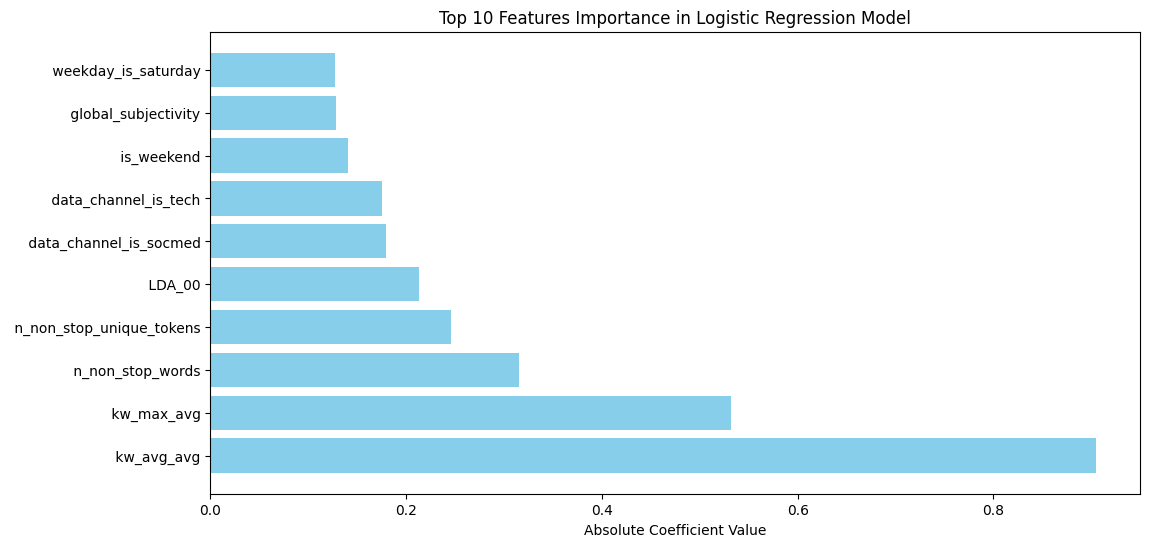

In [29]:
feature_names = list(train_features.columns)

feature_coefficients = best_model.named_steps['model'].coef_[0]
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': feature_coefficients})
feature_importance_df['Absolute Coefficient'] = np.abs(feature_importance_df['Coefficient'])
feature_importance_df = feature_importance_df.sort_values(by='Absolute Coefficient', ascending=False)

# Display the top features and their coefficients
print("Top Features and their Coefficients:")
print(feature_importance_df[['Feature', 'Coefficient']].head(10))

# Plot the feature importance
plt.figure(figsize=(12, 6))
plt.barh(feature_importance_df['Feature'].head(10), feature_importance_df['Absolute Coefficient'].head(10), color='skyblue')
plt.xlabel('Absolute Coefficient Value')
plt.title('Top 10 Features Importance in Logistic Regression Model')
plt.show()


### KNeighborsClassifier

In [26]:
standard_scaler_pipeline_KNN = Pipeline([
    ('scaler', StandardScaler()),
    ('model', KNeighborsClassifier())  
])

param_grid_KNN = {
    'model__n_neighbors': [3, 5, 7, 9, 11]  
}

# Use GridSearchCV to find the best hyperparameters
grid_search_KNN = GridSearchCV(standard_scaler_pipeline_KNN, param_grid_KNN, cv=2, scoring='accuracy')
grid_search_KNN.fit(train_features, train_target.values.ravel())

# Get the best parameters and the best model
best_params_KNN = grid_search_KNN.best_params_
best_model_KNN = grid_search_KNN.best_estimator_
y_pred_KNN = best_model_KNN.predict(test_features)

# Convert labels to numeric format
y_test_numeric_KNN = np.asarray(test_target, dtype=str)
y_pred_numeric_KNN = np.asarray(y_pred_KNN, dtype=str)


In [33]:
# Evaluate accuracy
accuracy_KNN = accuracy_score(test_target, y_pred_KNN)
print(f'Accuracy: {accuracy_KNN:.2f}')

# Evaluate F1 score
f1_KNN = f1_score(y_test_numeric_KNN, y_pred_numeric_KNN, average='micro')
print(f'F1 Score: {f1_KNN:.2f}')

# Evaluate macro-averaged precision and recall
precision_macro_KNN = precision_score(y_test_numeric_KNN, y_pred_numeric_KNN, average='macro')
recall_macro_KNN = recall_score(y_test_numeric_KNN, y_pred_numeric_KNN, average='macro')
print(f'Macro-Averaged Precision: {precision_macro_KNN:.2f}')
print(f'Macro-Averaged Recall: {recall_macro_KNN:.2f}')

# Evaluate micro-averaged precision and recall
precision_micro_KNN = precision_score(y_test_numeric_KNN, y_pred_numeric_KNN, average='micro')
recall_micro_KNN = recall_score(y_test_numeric_KNN, y_pred_numeric_KNN, average='micro')
print(f'Micro-Averaged Precision: {precision_micro_KNN:.2f}')
print(f'Micro-Averaged Recall: {recall_micro_KNN:.2f}')

# Print the best hyperparameters found by the grid search
print(f'Best Hyperparameters: {best_params_KNN}')



Accuracy: 0.62
F1 Score: 0.62
Macro-Averaged Precision: 0.63
Macro-Averaged Recall: 0.62
Micro-Averaged Precision: 0.62
Micro-Averaged Recall: 0.62
Best Hyperparameters: {'model__n_neighbors': 11}


#### Feature Importance KNeighboursClassifier

The K-Nearest Neighbors (KNN) algorithm doesn't have inherent feature importances like other models. However, one way to gain insights into feature importance in a KNN model is to perform feature scaling and observe the distances between data points.Features with larger scales might dominate the distance metric more than features with smaller scales.


Top Features and their Importances for KNN:
                    Feature  Importance
57   abs_title_subjectivity    0.917527
24               kw_min_avg    0.886241
0                 timedelta    0.875157
55       title_subjectivity    0.867316
11             num_keywords    0.839671
42                   LDA_04    0.837733
41                   LDA_03    0.834575
51    max_positive_polarity    0.828513
17    data_channel_is_world    0.819813
40                   LDA_02    0.817798


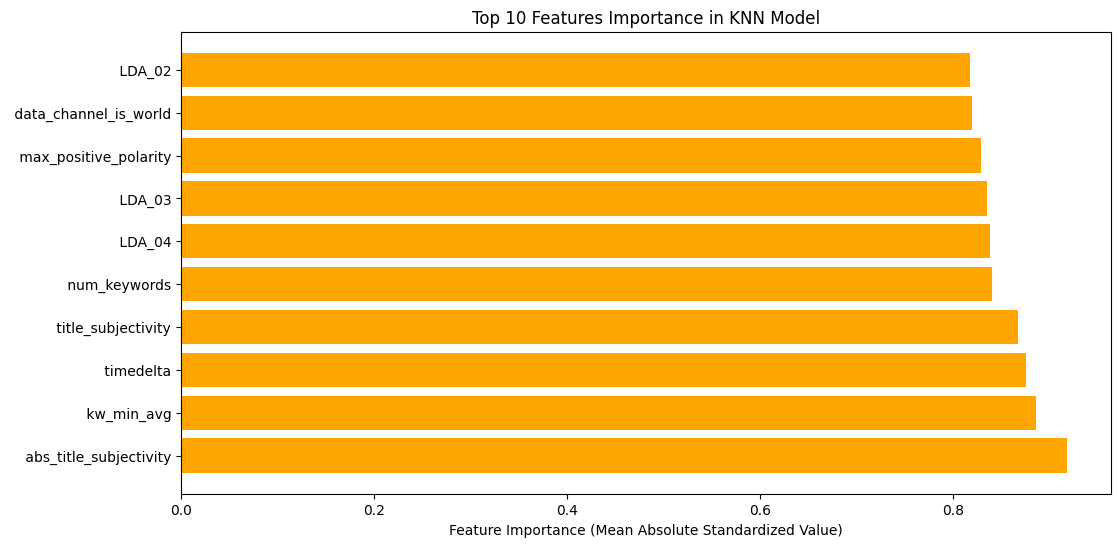

In [34]:
scaler = StandardScaler()
train_features_scaled = scaler.fit_transform(train_features)

feature_importance_KNN = np.mean(np.abs(train_features_scaled), axis=0)
feature_importance_df_KNN = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance_KNN})
feature_importance_df_KNN = feature_importance_df_KNN.sort_values(by='Importance', ascending=False)

# Display the top features and their importances
print("\nTop Features and their Importances for KNN:")
print(feature_importance_df_KNN.head(10))


# Plot the feature importance for KNN
plt.figure(figsize=(12, 6))
plt.barh(feature_importance_df_KNN['Feature'].head(10), feature_importance_df_KNN['Importance'].head(10), color='orange')
plt.xlabel('Feature Importance (Mean Absolute Standardized Value)')
plt.title('Top 10 Features Importance in KNN Model')
plt.show()


### Decision Tree

In [36]:
standard_scaler_pipeline_DT = Pipeline([
    ('scaler', StandardScaler()),
    ('model', DecisionTreeClassifier())  
])


param_grid_DT = {
    'model__criterion': ['gini', 'entropy'],
    'model__max_depth': [None, 5, 10, 15, 20],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4]
}

# Use GridSearchCV to find the best hyperparameters
grid_search_DT = GridSearchCV(standard_scaler_pipeline_DT, param_grid_DT, cv=2, scoring='accuracy')
grid_search_DT.fit(train_features, train_target.values.ravel())

# Get the best parameters and the best model
best_params_DT = grid_search_DT.best_params_
best_model_DT = grid_search_DT.best_estimator_

y_pred_DT = best_model_DT.predict(test_features)

# Print unique class labels in test_target
unique_labels = set(test_target['popularity'])
print("Unique labels in test_target:", unique_labels)

# Adjust the label_mapping based on the unique labels
label_mapping = {'Unpopular': 0, 'Popular': 1}  # Adjust based on your actual class labels

# Convert labels to numeric format
y_test_numeric_DT = np.asarray([label_mapping[label] for label in test_target['popularity']], dtype=int)
y_pred_numeric_DT = np.asarray([label_mapping[label] for label in y_pred_DT], dtype=int)

Unique labels in test_target: {'Popular', 'Unpopular'}


In [37]:
# Evaluate accuracy
accuracy_DT = accuracy_score(test_target, y_pred_DT)
print(f'Decision Tree - Accuracy: {accuracy_DT:.2f}')

# Evaluate F1 score
f1_DT = f1_score(y_test_numeric_DT, y_pred_numeric_DT, average='micro')
print(f'Decision Tree - F1 Score: {f1_DT:.2f}')

# Evaluate macro-averaged precision and recall
precision_macro_DT = precision_score(y_test_numeric_DT, y_pred_numeric_DT, average='macro')
recall_macro_DT = recall_score(y_test_numeric_DT, y_pred_numeric_DT, average='macro')
print(f'Decision Tree - Macro-Averaged Precision: {precision_macro_DT:.2f}')
print(f'Decision Tree - Macro-Averaged Recall: {recall_macro_DT:.2f}')

# Evaluate micro-averaged precision and recall
precision_micro_DT = precision_score(y_test_numeric_DT, y_pred_numeric_DT, average='micro')
recall_micro_DT = recall_score(y_test_numeric_DT, y_pred_numeric_DT, average='micro')
print(f'Decision Tree - Micro-Averaged Precision: {precision_micro_DT:.2f}')
print(f'Decision Tree - Micro-Averaged Recall: {recall_micro_DT:.2f}')

# Print the best hyperparameters found by the grid search
print(f'Decision Tree - Best Hyperparameters: {best_params_DT}')

Decision Tree - Accuracy: 0.63
Decision Tree - F1 Score: 0.63
Decision Tree - Macro-Averaged Precision: 0.63
Decision Tree - Macro-Averaged Recall: 0.63
Decision Tree - Micro-Averaged Precision: 0.63
Decision Tree - Micro-Averaged Recall: 0.63
Decision Tree - Best Hyperparameters: {'model__criterion': 'gini', 'model__max_depth': 5, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2}


#### Feature Importance DecisionTree


Top Features and their Importances for Decision Tree:
                           Feature  Importance
26                      kw_avg_avg    0.334025
37                      is_weekend    0.140181
13   data_channel_is_entertainment    0.113479
0                        timedelta    0.092880
29      self_reference_avg_sharess    0.075341
27       self_reference_min_shares    0.066534
15          data_channel_is_socmed    0.043845
40                          LDA_02    0.028990
16            data_channel_is_tech    0.028359
25                      kw_max_avg    0.026616


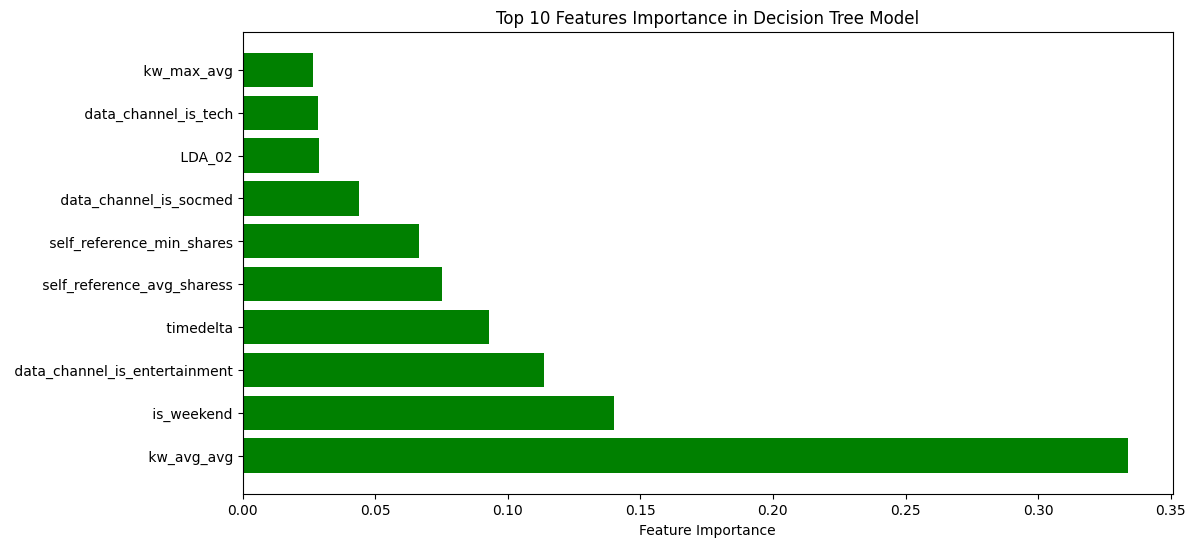

In [38]:
feature_names_DT = list(train_features.columns)
feature_importances_DT = best_model_DT.named_steps['model'].feature_importances_
feature_importance_df_DT = pd.DataFrame({'Feature': feature_names_DT, 'Importance': feature_importances_DT})
feature_importance_df_DT = feature_importance_df_DT.sort_values(by='Importance', ascending=False)

# Display the top features and their importances
print("\nTop Features and their Importances for Decision Tree:")
print(feature_importance_df_DT.head(10))

# Plot the feature importance for Decision Tree
plt.figure(figsize=(12, 6))
plt.barh(feature_importance_df_DT['Feature'].head(10), feature_importance_df_DT['Importance'].head(10), color='green')
plt.xlabel('Feature Importance')
plt.title('Top 10 Features Importance in Decision Tree Model')
plt.show()

## Overall Comparison of the feature importance:

Logistic Regression emphasizes features like 'kw_avg_avg' and 'kw_max_avg' with both positive and negative coefficients, indicating their impact on prediction.

KNeighbor Classifier gives high importance to features such as 'abs_title_subjectivity' and 'kw_min_avg,' suggesting their significant influence on the model.

Decision Tree prioritizes 'kw_avg_avg' and 'is_weekend' as the most important features, providing insights into the decision-making process.